In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
import time
from iexfinance import stock

In [2]:
url = 'https://api.iextrading.com/1.0/stock'

In [3]:
stocks = ['STLD', 'NUE', 'CLF', 'RS']

In [4]:
start_date = pd.datetime(2018, 1 ,2)
end_date = pd.datetime(2018, 3, 31)
date_list = (pd.bdate_range(start_date, end_date))
dates = (date_list.strftime('%Y-%m-%d')).tolist()

close_dates = ['2018-01-15', '2018-02-19', '2018-03-30']

final_dates = []

for day in dates:
    if day not in close_dates:
        final_dates.append(day)
        
instance_number = range(len(final_dates))

In [5]:
stock_data = []

for symbol in stocks: 
    for x in instance_number:
        query_url = requests.get(url + '/' + symbol + '/chart' + '/ytd').json()
        trade_date = query_url[x]['date']
        open_price = query_url[x]['open']
        close_price = query_url[x]['close']
        percent_change = query_url[x]['changePercent']
        
        stock_data.append({'Stock' : symbol, 'Date' : trade_date, 'Open' : open_price, 'Close' : close_price, 'Percent_Change' : percent_change})       

In [6]:
stock_df = pd.DataFrame(stock_data)

In [7]:
stock_final = stock_df.loc[(stock_df['Date'] >= '2018-02-23') & (stock_df['Date'] <= '2018-03-31')]

In [8]:
stock_final.head()

,Close,Date,Open,Percent_Change,Stock
36,47.2632,2018-02-23,49.1250,-1.104,STLD
37,47.8108,2018-02-26,48.1393,1.159,STLD
38,47.3030,2018-02-27,47.6813,-1.062,STLD
39,46.0485,2018-02-28,47.4523,-2.652,STLD
40,47.8904,2018-03-01,47.4723,4.000,STLD


/Users/tamaradaniels/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


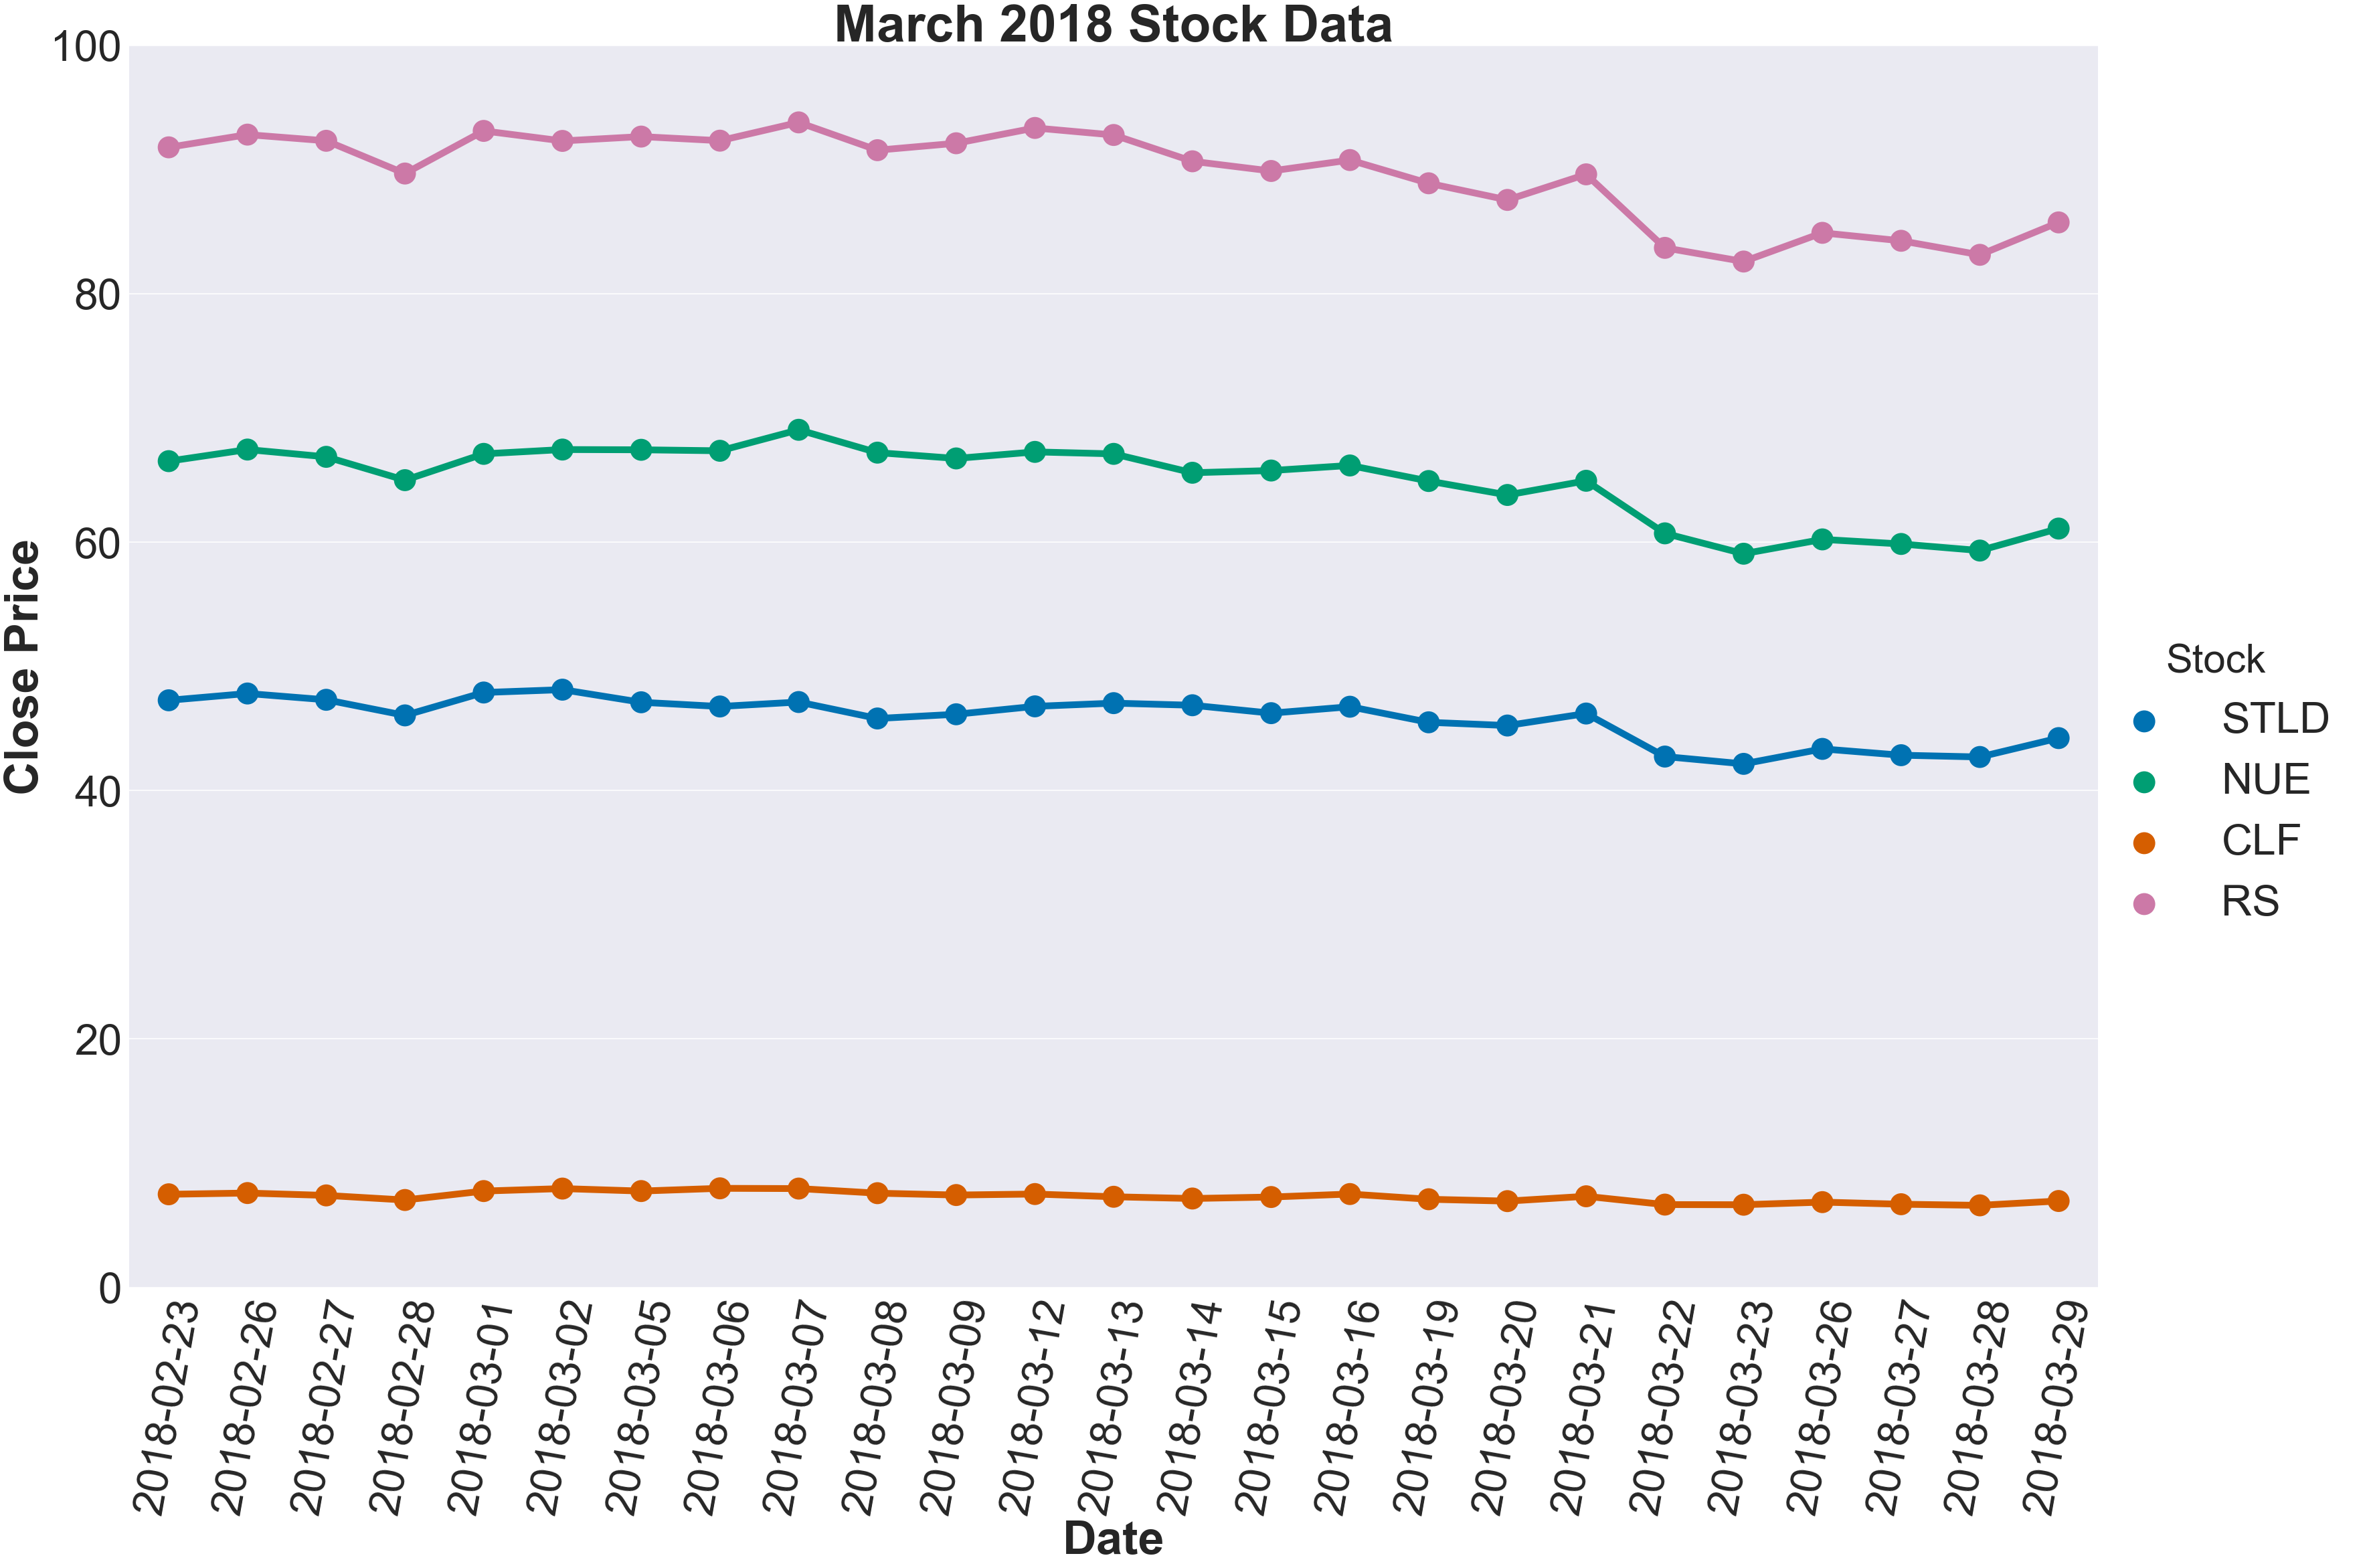

In [25]:
sns.set(context = 'poster', style = 'darkgrid', palette ='colorblind', font = 'Arial', font_scale = 4)
g = sns.factorplot('Date', 'Close', hue = 'Stock', data = stock_final, markers = 'o', size = 30, aspect = 1.5, scale = 2)
g.set_xticklabels(rotation=80)
plt.ylim(0, 100)


plt.title('March 2018 Stock Data', weight = 'bold')
plt.xlabel('Date', weight = 'bold')
plt.ylabel('Close Price', weight = 'bold')
plt.show()